In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.markers
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab

from matplotlib import rc
%matplotlib inline
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})


# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'


# Reward


In [2]:
Progress_PPO = pd.read_csv('data/output/PPO/simulation3/progress.csv')
#Progress_PPO_no_transfer = pd.read_csv('data/output/PPO/simulation3/progress.csv')
#Progress_PPO_old = pd.read_csv('data/output/PPO/progress.csv')



In [3]:
Rewards_DDPG = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_True_rewards_dqn.pkl', "rb"))
rewards_df = pd.DataFrame()
rewards_df['reward'] = Rewards_DDPG[:-1]

# Reward

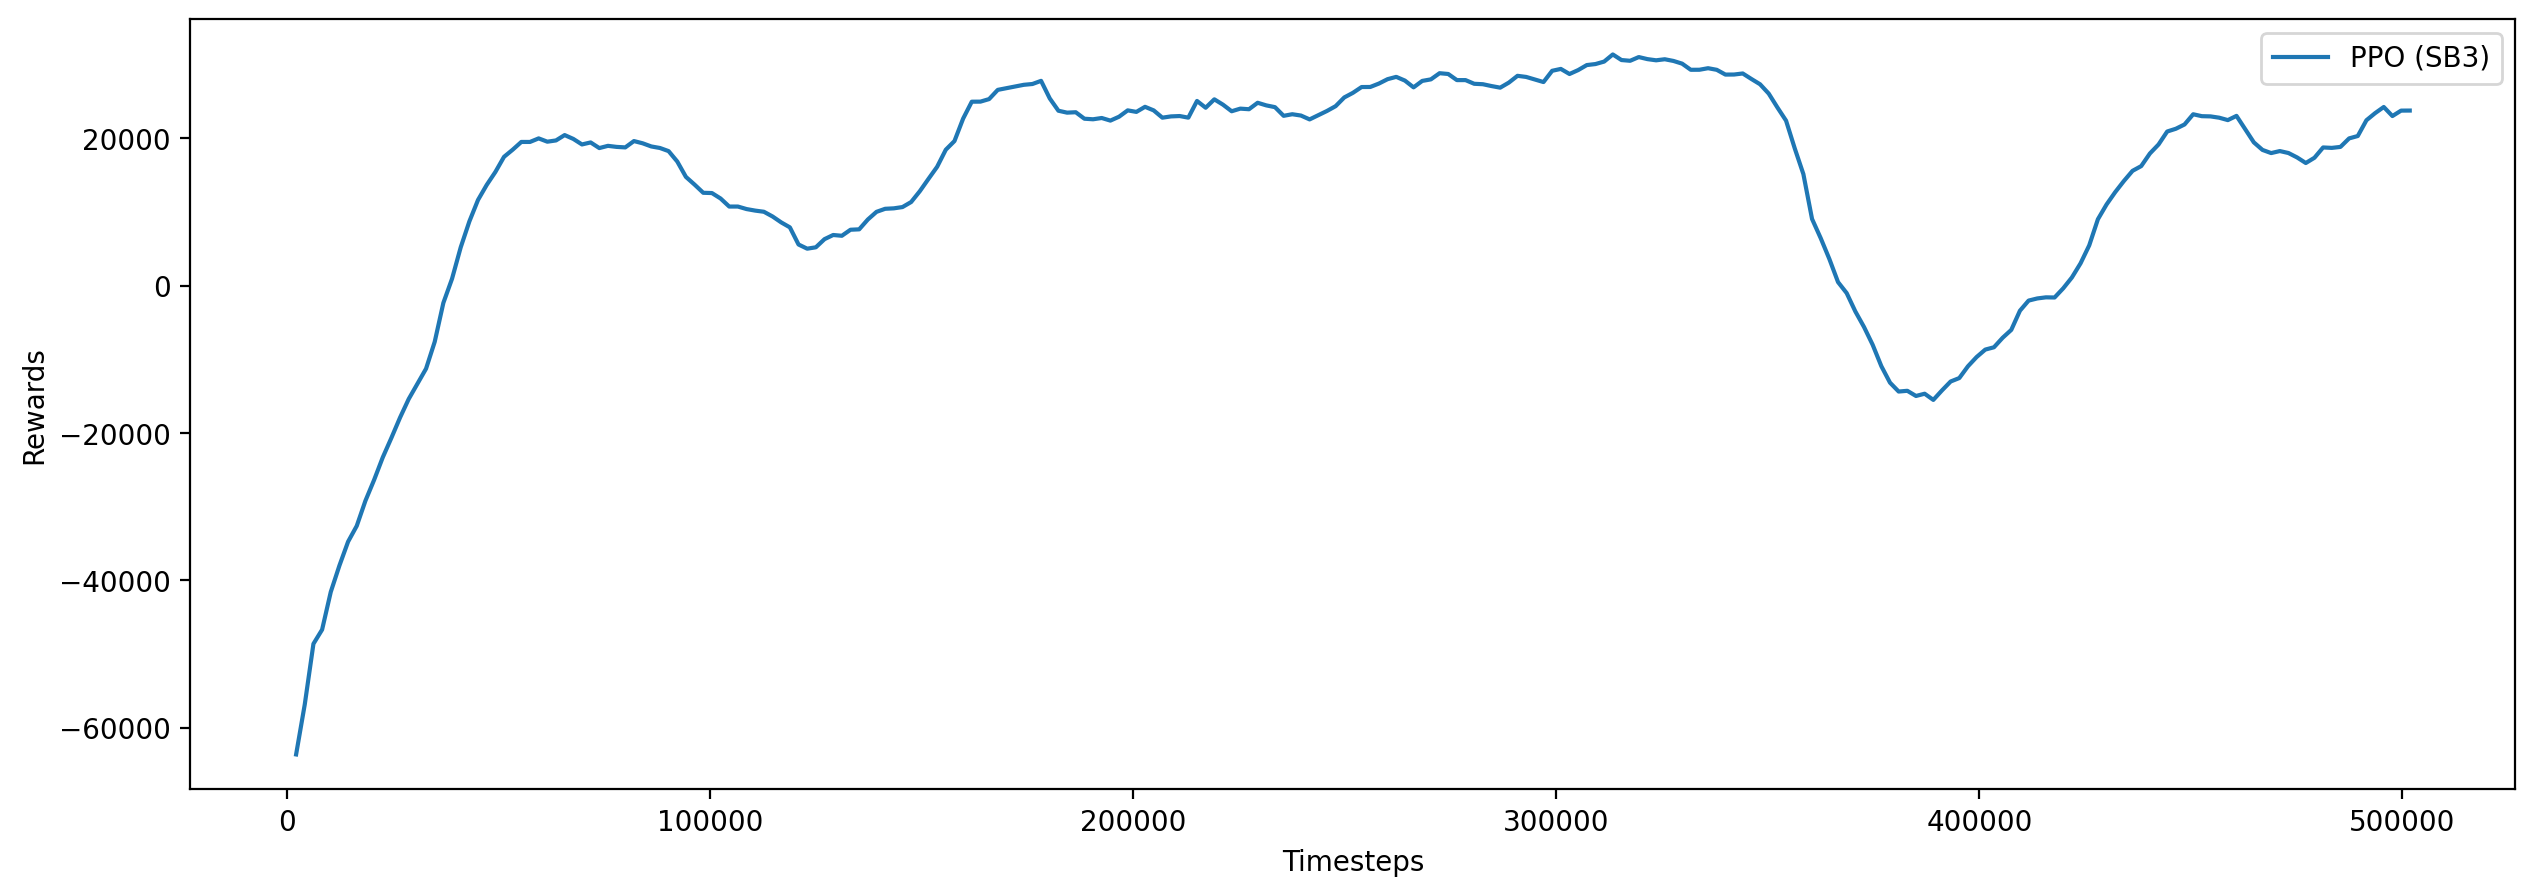

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generiere einige Daten
# Erstelle eine Figur und Achsen mit Matplotlib
fig, ax = plt.subplots(figsize=(15,5))

# Zeichne die Daten
ax.plot(Progress_PPO["time/total_timesteps"], Progress_PPO["rollout/ep_rew_mean"] , label='PPO (SB3)')
##ax.plot(Progress_PPO_no_transfer["time/total_timesteps"], Progress_PPO_no_transfer["rollout/ep_rew_mean"] , label='PPO (SB3) without Transfer Learning (Sofia, Bulgaria)')
#ax.plot(Progress_PPO_old["time/total_timesteps"], Progress_PPO_old["rollout/ep_rew_mean"] , label='PPO (SB3) without Transfer Learning (Puertollano, Spain)')

# Setze Titel und Beschriftungen
ax.set_xlabel('Timesteps')
ax.set_ylabel('Rewards')

# Füge Legende hinzu
ax.legend()
# Zeige den Plot
plt.show()

Cost

In [5]:
evalPPO = pkl.load(open('data/output/PPO/PPO_eval.pkl', "rb"))
evalDDPG = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', "rb"))
evalA2C = pkl.load(open('data/output/A2C/A2C_eval.pkl', "rb"))
evalTD3 = pkl.load(open('data/output/TD3/TD3_eval.pkl', "rb"))

In [6]:
cost_ppo = evalPPO['Cost'].sum()
cost_ddpg = evalDDPG['Cost'].sum()
cost_a2c = evalA2C['Cost'].sum()
cost_td3 = evalTD3['Cost'].sum()

cost_ppo_gas = (evalPPO['Prices Natural gas'] * evalPPO['Natural Gas']).sum() 
cost_ddpg_gas = (evalDDPG['Prices Natural gas'] * evalDDPG['Natural Gas']).sum() 
cost_a2c_gas = (evalA2C['Prices Natural gas'] * evalA2C['Natural Gas']).sum() 
cost_td3_gas = (evalTD3['Prices Natural gas'] * evalTD3['Natural Gas']).sum() 

positive_power_rows = evalPPO[evalPPO['Power'] > 0]
cost_ppo_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()

positive_power_rows = evalTD3[evalTD3['Power'] > 0]
cost_td3_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()

positive_power_rows = evalA2C[evalA2C['Power'] > 0]
cost_a2c_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()

positive_power_rows = evalDDPG[evalDDPG['Power'] > 0]
cost_ddpg_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()


profit_ppo = evalPPO['Profits'].sum() * 300
profit_a2c = evalA2C['Profits'].sum() * 300
profit_ddpg = evalDDPG['Profits'].sum() * 300
profit_td3 = evalTD3['Profits'].sum() * 300


df = pd.DataFrame({
    'Algorithm': ['PPO', 'A2C', 'DDPG', 'TD3'],
    'Strom': [cost_ppo_energy, cost_a2c_energy, cost_ddpg_energy, cost_td3_energy],
    'Gas': [cost_ppo_gas, cost_a2c_gas, cost_ddpg_gas, cost_td3_gas],
    'Total Cost': [cost_ppo_gas + cost_ppo_energy, cost_a2c_gas + cost_a2c_energy, cost_ddpg_gas + cost_ddpg_energy, cost_td3_gas + cost_td3_energy],
    'Ammonia Profit': [profit_ppo, profit_a2c, cost_ddpg_gas, profit_td3]
})


df['Strom'] = df['Strom'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Gas'] = df['Gas'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Ammonia Profit'] = df['Ammonia Profit'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Total Cost'] = df['Total Cost'].apply(lambda x: "$ {:0,.2f}".format(x))
print(df)

  Algorithm         Strom           Gas    Total Cost  Ammonia Profit
0       PPO   $ 22,959.32  $ 205,594.59  $ 228,553.91  $ 6,844,050.00
1       A2C  $ 277,405.99    $ 1,702.88  $ 279,108.87  $ 6,844,050.00
2      DDPG  $ 240,086.39        $ 0.00  $ 240,086.39          $ 0.00
3       TD3      $ 292.77  $ 469,612.25  $ 469,905.03  $ 6,844,050.00


In [7]:
costSumPPO = evalPPO['Cost'].sum()
costSumDDPG = evalDDPG['Cost'].sum()

print("$ {:0,.2f}".format(costSumPPO))
print("$ {:0,.2f}".format(costSumDDPG))

$ -54,341.64
$ -274,902.55


In [8]:
rewards = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_True_rewards_dqn.pkl', "rb"))

In [9]:
rewards[-1]

-3200.000090080085

In [10]:
costs = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_True_price_ammonia_ddpg.pkl', "rb"))

In [11]:
costs[-1]

302.1858381807287

In [12]:
eval_data = pkl.load(open('data/output/PPO/PPO_eval.pkl', 'rb'))

In [13]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [14]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [15]:
r = rewards_df.fillna(rewards_df.mean())

In [16]:
moving_avg = r.rolling(window=10).mean()

In [17]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

## Evaluation

In [18]:
eval_data = pkl.load(open('data/output/PPO/simulation3/PPO_eval.pkl', 'rb'))
eval_data_td3 = pkl.load(open('data/output/TD3/TD3_eval.pkl', 'rb'))

In [23]:
eval_data

,Actions,Rewards,Action1,Action2,Action3,PV Generation,Datetime,Gas Consumption,Cost,Prices,...,Prices Natural gas,Moles,Storage,Power,Sun Power,Hydrogen,Wind Power,Natural Gas,Ammonia Left,Date
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00.000000000,"[0, 0, 0]",0,0.0,0.0,0.0,0.0,2017-07-28 00:00:00,0,0.000000,44.53,...,2.96,10.000000,0.0,0.0,0.0,0.0,0,0.0000,0.000000e+00,2019-05-01 00:00:00.000000000
2019-05-02 02:04:17.142857142,"[0.0, 1.0, 0.0]",[28.516212],0.0,1.0,0.0,0.0,2017-07-28 01:00:00,0,-39.583787,45.00,...,2.96,0.000000,0.0,0.0,0.0,0.0,0,481.0396,1.670000e+06,2019-05-02 02:04:17.142857142
2019-05-03 04:08:34.285714285,"[0.0, 1.0, 0.0]",[28.503014],0.0,1.0,0.0,0.0,2017-07-28 02:00:00,0,-39.596986,45.04,...,2.96,0.000000,0.0,0.0,0.0,0.0,0,481.2000,1.660000e+06,2019-05-03 04:08:34.285714285
2019-05-04 06:12:51.428571428,"[0.0, 1.0, 0.0]",[28.503014],0.0,1.0,0.0,0.0,2017-07-28 03:00:00,0,-39.596986,45.02,...,2.96,0.000000,0.0,0.0,0.0,0.0,0,481.2000,1.650000e+06,2019-05-04 06:12:51.428571428
2019-05-05 08:17:08.571428571,"[0.0, 1.0, 0.0]",[28.503014],0.0,1.0,0.0,0.0,2017-07-28 04:00:00,0,-39.596986,47.20,...,2.96,0.000000,0.0,0.0,0.0,0.0,0,481.2000,1.640000e+06,2019-05-05 08:17:08.571428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-25 15:42:51.428571428,"[0.0, 0.0, 0.0]",[0.0],0.0,0.0,0.0,0.0,2017-08-10 20:00:00,0,-0.000000,49.00,...,2.89,821421.926335,0.0,0.0,0.0,0.0,0,0.0000,5.789089e+04,2020-04-25 15:42:51.428571428
2020-04-26 17:47:08.571428572,"[0.0, 0.0, 0.0]",[0.0],0.0,0.0,0.0,0.0,2017-08-10 21:00:00,0,-0.000000,47.44,...,2.89,821421.926335,0.0,0.0,0.0,0.0,0,0.0000,5.789089e+04,2020-04-26 17:47:08.571428572
2020-04-27 19:51:25.714285716,"[0.0, 0.0, 0.0]",[0.0],0.0,0.0,0.0,0.0,2017-08-10 22:00:00,0,-0.000000,37.86,...,2.89,821421.926335,0.0,0.0,0.0,0.0,0,0.0000,5.789089e+04,2020-04-27 19:51:25.714285716


In [20]:
eval_data['Date'] = pd.date_range(start='2019-05-01',end='2020-04-30', periods=len(eval_data))
eval_data.index = eval_data['Date']

# intervall (stunde)

/var/folders/56/zg0fn3gn6l9f7bd64sff_jjc0000gn/T/ipykernel_26261/3031527931.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_week['Storage'] = one_week['Storage']*1e-6


IndexError: index 10 is out of bounds for axis 0 with size 10

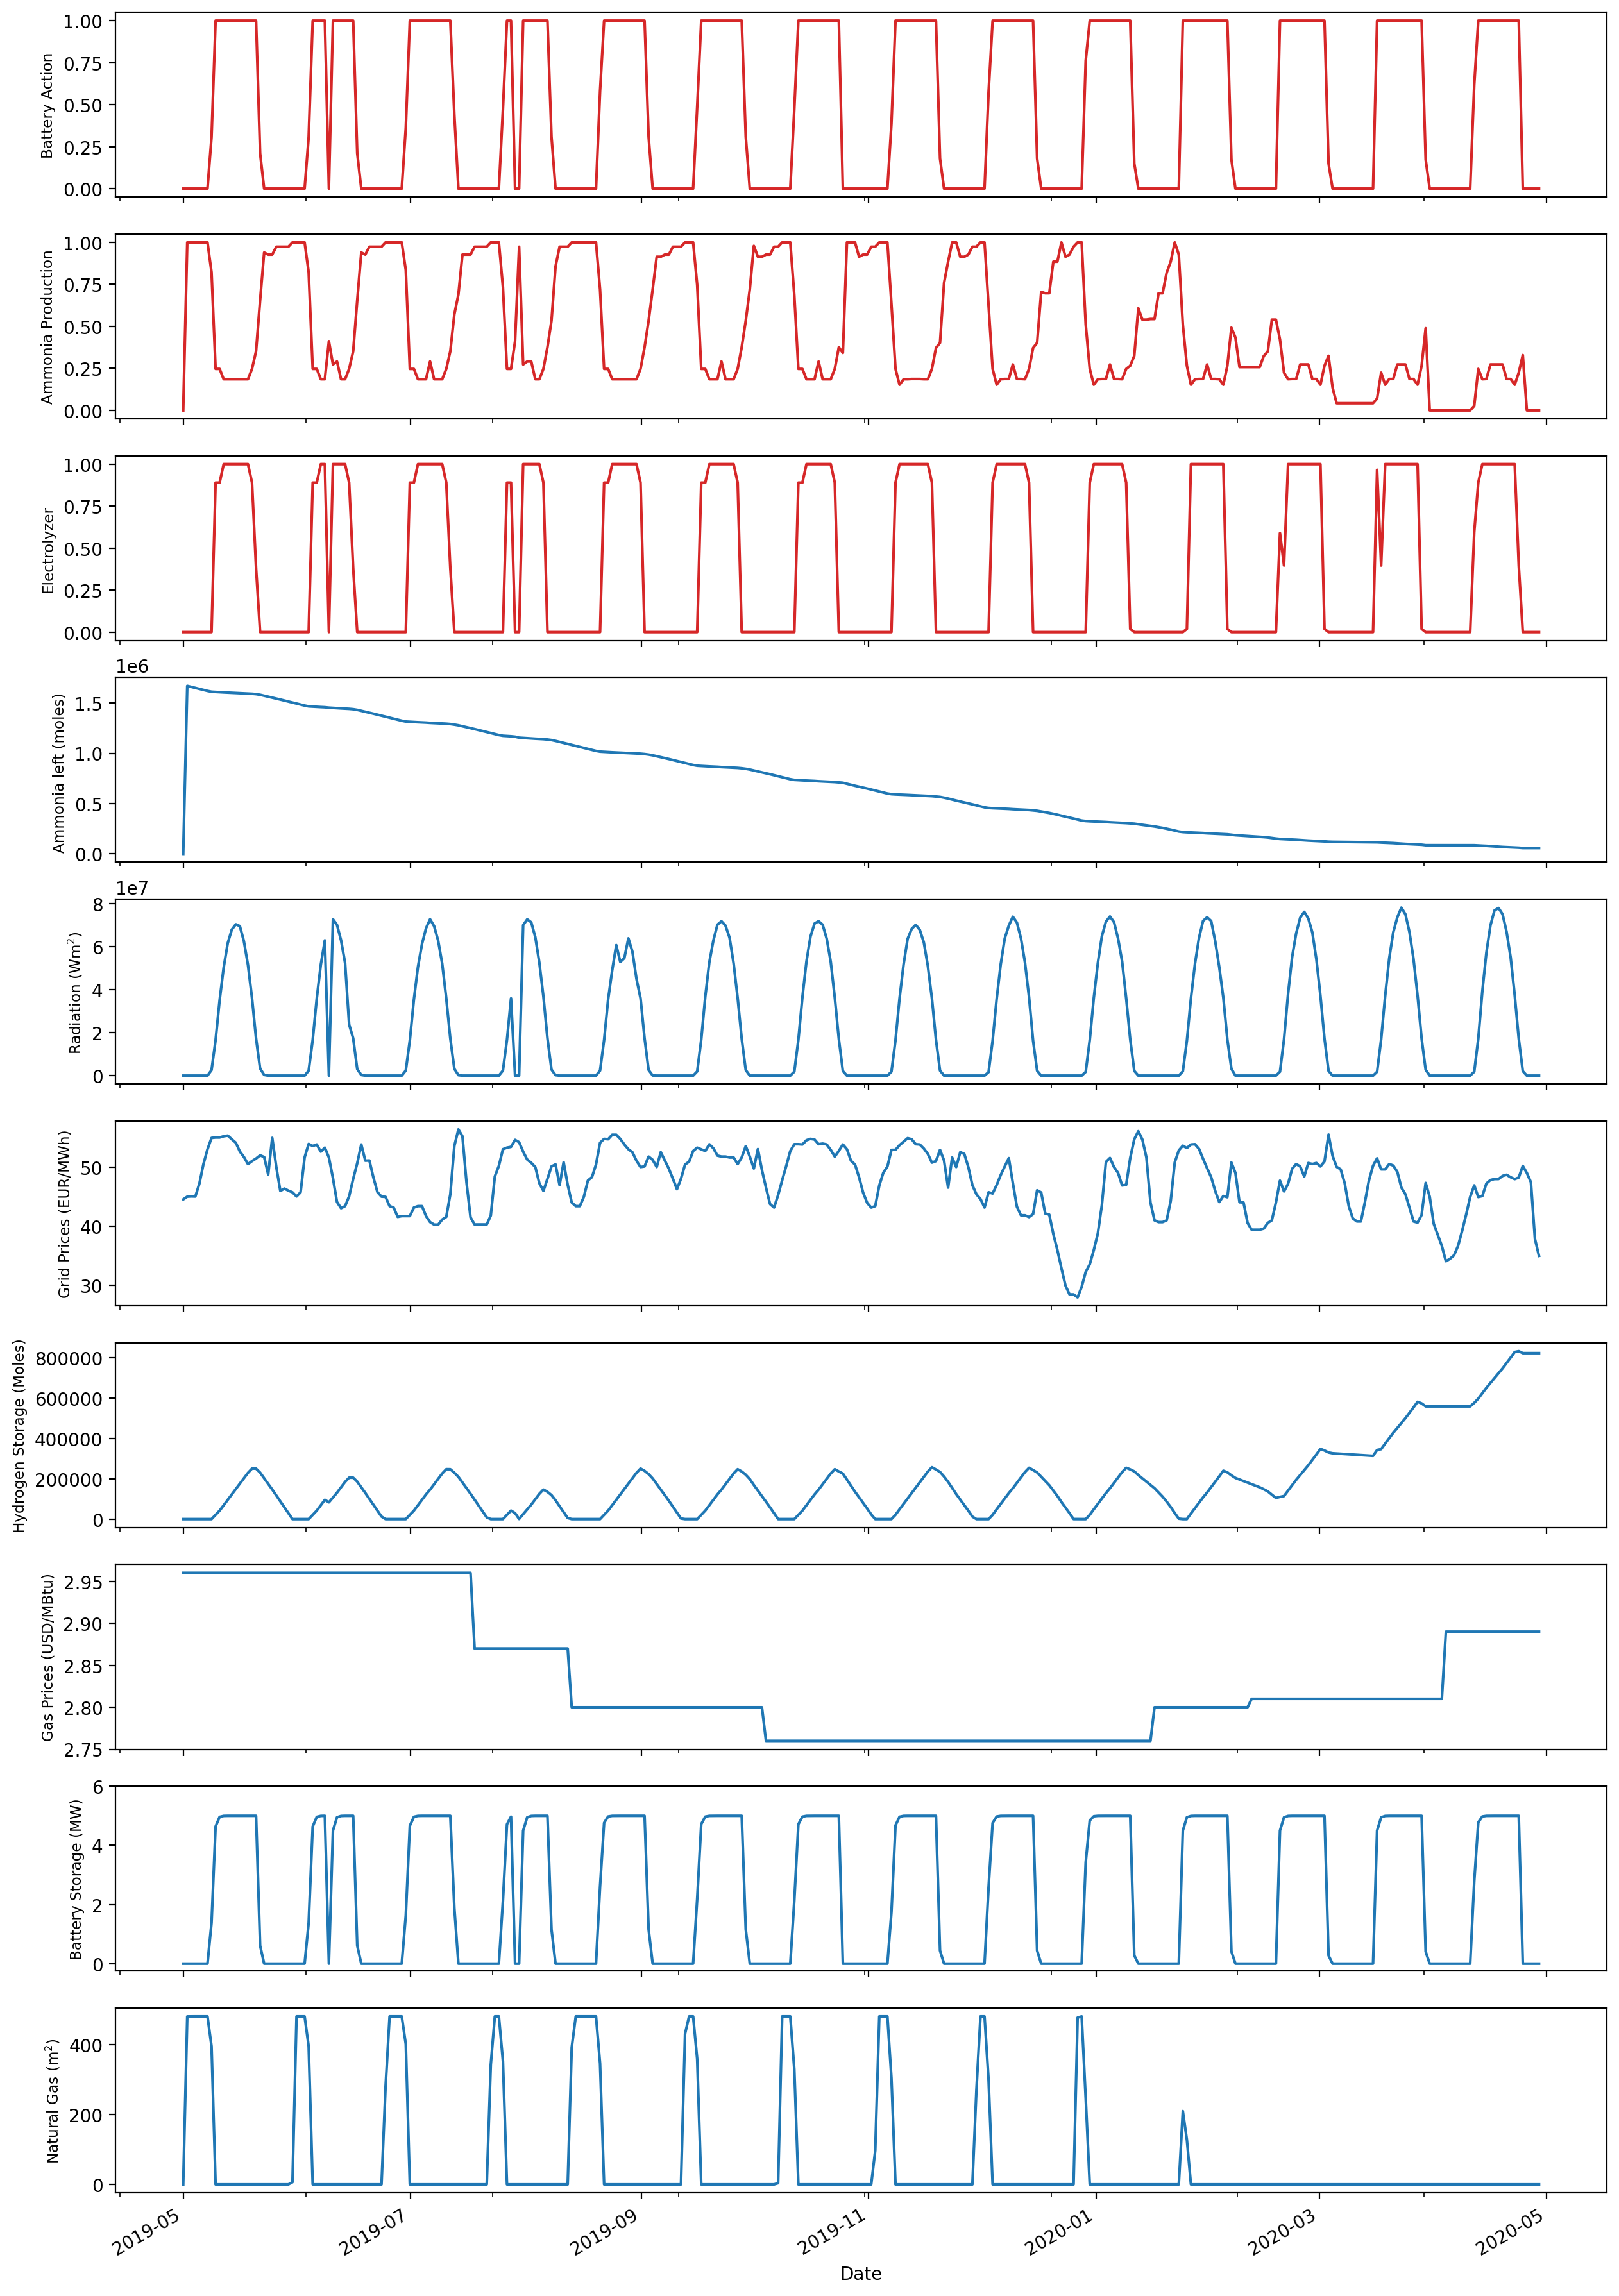

In [24]:
f, axs = plt.subplots(11,figsize=(15,25), sharex=True) #nrows=1, ncols=2,
#one_week = eval_data.iloc[0:]
#df = df.iloc[3:]
one_week = eval_data.iloc[:-1]
#E69F00

one_week['Action1'].plot(ax=axs[0], legend=False, color="#d62728")
axs[0].set_ylabel('Battery Action', fontsize='small')

one_week['Action2'].plot(ax=axs[1], legend=False, color="#d62728")
axs[1].set_ylabel('Ammonia Production', fontsize='small')

one_week['Action3'].plot(ax=axs[2], legend=False, color="#d62728")
axs[2].set_ylabel('Electrolyzer', fontsize='small')

one_week['Ammonia Left'].plot(ax=axs[3], legend=False, color="#1f77b4")
axs[3].set_ylabel('Ammonia left (moles) ', fontsize='small')

one_week['PV Generation'].plot(ax=axs[4], legend=False, color="#1f77b4")
axs[4].set_ylabel('Radiation (W$m^2$) ', fontsize='small')

one_week['Prices'].plot(ax=axs[5], linewidth=1.5, color="#1f77b4")
axs[5].set_ylabel('Grid Prices (EUR/MWh)', fontsize='small')

one_week['Moles'].plot(ax=axs[6], legend=False, color="#1f77b4")
axs[6].set_ylabel('Hydrogen Storage (Moles)', fontsize='small')

one_week['Prices Natural gas'].plot(ax=axs[7], legend=False, color="#1f77b4")
axs[7].set_ylabel('Gas Prices (USD/MBtu)', fontsize='small')

one_week['Storage'] = one_week['Storage']*1e-6
one_week['Storage'].plot(ax=axs[8], legend=False, color="#1f77b4")
axs[8].set_ylabel('Battery Storage (MW)', fontsize='small')
axs[8].set_ylim([None, 6]) 

one_week['Natural Gas'].plot(ax=axs[9], legend=False, color="#1f77b4")
axs[9].set_ylabel('Natural Gas ($m^2$)', fontsize='small')

eval_data['Power'].plot(ax=axs[10], legend=False, color="#1f77b4")
axs[10].set_ylabel('Power from grid(MW)', fontsize='small')


#self.sun_power, self.price, self.storage, self.moles, self.natural_gas_price

plt.subplots_adjust(hspace=0.2)
plt.savefig('data/output/DDPG/images/simulation_result.jpg',  dpi=400, bbox_inches='tight')


In [22]:

print("Average Grid Prices:", np.average(plot_data4['Prices']))
power = np.maximum(0, plot_data4['Power']* plot_data4['Prices'])
print("Average Buy Prices:", np.average(power) )



NameError: name 'plot_data4' is not defined